In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/CV/Ex_4/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/banana_78.jpg
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_77.jpg
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_77.xml
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_95.jpg
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_93.xml
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_81.xml
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_86.xml
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_80.xml
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_79.jpg
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_95.xml
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/banana_77.xml
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_93.jpg
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_82.jpg
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_94.jpg
/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test/apple_81.jpg
/content

In [ ]:
test_dir = '/content/drive/MyDrive/CV/Ex_4/Dataset/test_zip/test'
train_dir = '/content/drive/MyDrive/CV/Ex_4/Dataset/train_zip/train'

output_dir = '/content/drive/MyDrive/CV/Ex_4/Dataset/working'


In [ ]:
os.makedirs('/content/drive/MyDrive/CV/Ex_4/Dataset/working/train', exist_ok=True)


In [ ]:
import shutil

label_dir = "/content/drive/MyDrive/CV/Ex_4/Dataset/working/train/label"
image_dir = "/content/drive/MyDrive/CV/Ex_4/Dataset/working/train/image"

os.makedirs(label_dir, exist_ok=True)
os.makedirs(image_dir, exist_ok=True)

for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_dir, file), label_dir)

for filename in os.listdir(train_dir):
    if filename.endswith(".jpg"):
        image = Image.open(os.path.join(train_dir, filename))
        image = image.convert("RGB")
        new_filename = os.path.splitext(filename)[0] + ".jpeg"
        image.save(os.path.join(image_dir, new_filename), "JPEG")


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
for i in glob.glob(train_dir+'/*.xml'):
    print(i.split('/')[-1][0:-4])
    break


apple_24


In [ ]:
df = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

for idx, anno in enumerate(glob.glob(label_dir + '/*.xml')):
    trees = ET.parse(anno)

    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width = int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]]
                    df['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

In [ ]:
df1 = pd.DataFrame(df)
df1.sample(10)


,name,label,width,height,xmin,ymin,xmax,ymax
386,mixed_4,apple,640,857,127,148,320,371
149,apple_5,apple,620,350,264,64,370,159
356,orange_21,orange,1999,1200,1074,230,1458,657
361,banana_9,banana,2048,2728,822,381,1448,1519
174,banana_34,banana,300,318,63,48,273,310
59,apple_30,apple,800,800,254,163,582,487
186,banana_35,banana,0,0,74,83,243,191
400,orange_40,orange,960,720,664,128,919,369
379,orange_24,orange,1280,853,559,81,869,339
408,orange_43,orange,250,250,83,107,161,198


In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    465 non-null    object
 1   label   465 non-null    object
 2   width   465 non-null    int64 
 3   height  465 non-null    int64 
 4   xmin    465 non-null    int64 
 5   ymin    465 non-null    int64 
 6   xmax    465 non-null    int64 
 7   ymax    465 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 29.2+ KB


In [ ]:
df1['label'].unique()


array(['apple', 'banana', 'orange'], dtype=object)

In [ ]:
label_map = { 'orange': 0,
            'apple': 1,
            'banana': 2}

df1['class'] = df1['label'].map(label_map)


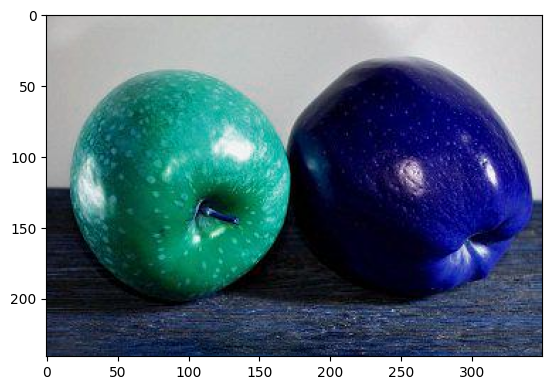

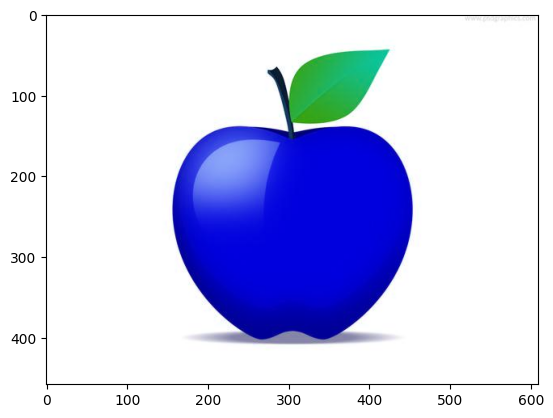

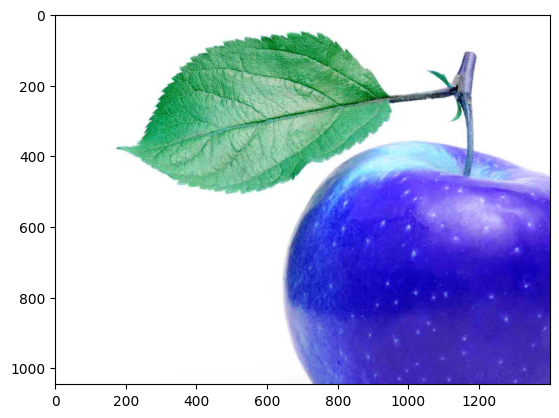

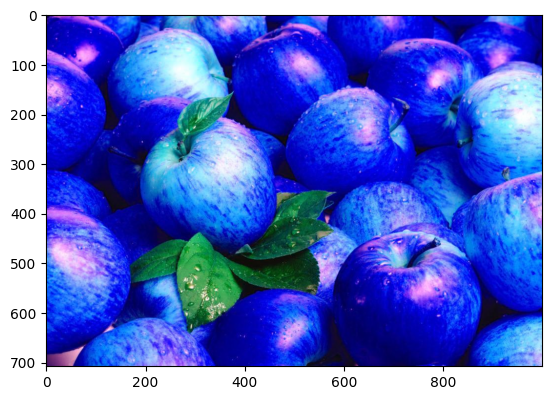

In [ ]:
for idx, image in enumerate(os.listdir(image_dir)):
    img = cv2.imread(os.path.join(image_dir, image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break


In [ ]:
img_file_path = []
for img in os.listdir(image_dir):
    image  = cv2.imread(os.path.join(image_dir, img), 0)
    img_file_path.append(f'{img}')


In [ ]:
img_file_path

['apple_25.jpeg',
 'apple_18.jpeg',
 'apple_15.jpeg',
 'apple_3.jpeg',
 'apple_24.jpeg',
 'apple_20.jpeg',
 'apple_29.jpeg',
 'apple_16.jpeg',
 'apple_13.jpeg',
 'apple_1.jpeg',
 'apple_28.jpeg',
 'apple_19.jpeg',
 'apple_21.jpeg',
 'apple_14.jpeg',
 'apple_22.jpeg',
 'apple_11.jpeg',
 'apple_26.jpeg',
 'apple_10.jpeg',
 'apple_23.jpeg',
 'apple_17.jpeg',
 'apple_2.jpeg',
 'apple_12.jpeg',
 'apple_27.jpeg',
 'apple_53.jpeg',
 'apple_9.jpeg',
 'apple_37.jpeg',
 'apple_48.jpeg',
 'apple_56.jpeg',
 'apple_57.jpeg',
 'apple_32.jpeg',
 'apple_45.jpeg',
 'apple_5.jpeg',
 'apple_74.jpeg',
 'banana_12.jpeg',
 'apple_63.jpeg',
 'apple_72.jpeg',
 'apple_67.jpeg',
 'apple_68.jpeg',
 'apple_30.jpeg',
 'apple_51.jpeg',
 'banana_13.jpeg',
 'apple_4.jpeg',
 'apple_36.jpeg',
 'apple_39.jpeg',
 'apple_44.jpeg',
 'apple_62.jpeg',
 'apple_75.jpeg',
 'apple_6.jpeg',
 'apple_66.jpeg',
 'apple_43.jpeg',
 'banana_11.jpeg',
 'apple_41.jpeg',
 'apple_58.jpeg',
 'apple_50.jpeg',
 'apple_33.jpeg',
 'apple_59.jpe

In [ ]:
for i in glob.glob(label_dir+'/*.xml'):
    print(i.split('/')[-1][0:-4])



apple_24
apple_12
apple_22
apple_13
apple_16
apple_28
apple_26
apple_25
apple_23
apple_27
apple_14
apple_21
apple_29
apple_10
apple_17
apple_1
apple_18
apple_19
apple_20
apple_11
apple_15
apple_2
apple_52
apple_31
apple_63
apple_54
apple_62
apple_47
apple_46
apple_7
apple_51
apple_58
apple_40
apple_30
apple_36
apple_75
apple_6
apple_45
apple_53
banana_12
apple_32
banana_13
apple_65
apple_35
apple_64
apple_8
apple_41
banana_10
apple_3
apple_42
apple_9
apple_69
apple_56
apple_61
apple_50
apple_38
apple_66
apple_43
apple_44
apple_67
apple_73
apple_60
apple_76
banana_11
apple_68
apple_70
apple_33
apple_55
banana_1
apple_4
apple_74
apple_71
apple_48
apple_39
apple_49
apple_37
apple_59
banana_14
apple_72
apple_57
apple_5
banana_55
banana_2
banana_33
banana_25
banana_5
banana_64
banana_31
banana_24
banana_53
banana_66
banana_54
banana_61
banana_34
banana_4
banana_56
banana_62
banana_20
banana_21
banana_35
banana_65
banana_63
banana_28
banana_7
banana_42
banana_17
banana_52
banana_68
banana_69

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(img_file_path, test_size=0.15, random_state=101)


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd /content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5
!pip install -qr requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 15829, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 15829 (delta 21), reused 35 (delta 16), pack-reused 15768
Receiving objects: 100% (15829/15829), 14.65 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (10833/10833), done.
/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.0/608.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
os.chdir('/content/drive/MyDrive/CV/Ex_4/Dataset/working')
os.mkdir('/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/train')
os.mkdir('/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/val')
os.mkdir('/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/train/images')
os.mkdir('/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/train/labels')
os.mkdir('/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/val/images')
os.mkdir('/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/val/labels')


In [ ]:
def copy_image_file(image_items, folder_name):

    for image in image_items:
        img = Image.open(f'{image_dir}/{image}')
        img1 = img.resize((640, 480))
        _ = img1.save(f'{output_dir}/yolov5/data/{folder_name}/images/{image}')


In [ ]:
copy_image_file(train, 'train')
copy_image_file(val, 'val')


In [ ]:
df1['xmin'] = (640/df1['width']) * df1['xmin']
df1['ymin'] = (480/df1['height']) * df1['ymin']
df1['xmax'] = (640/df1['width']) * df1['xmax']
df1['ymax'] = (480/df1['height']) * df1['ymax']
df1


,name,label,width,height,xmin,ymin,xmax,ymax,class
0,apple_24,apple,1132,1696,62.190813,206.603774,516.183746,438.962264,1
1,apple_24,apple,1132,1696,0.565371,0.283019,230.106007,174.622642,1
2,apple_24,apple,1132,1696,58.798587,1.132075,352.791519,157.641509,1
3,apple_12,apple,450,428,61.155556,23.551402,497.777778,395.887850,1
4,apple_22,apple,693,693,125.598846,137.835498,525.483405,434.978355,1
...,...,...,...,...,...,...,...,...,...
460,orange_68,orange,0,0,inf,inf,inf,inf,0
461,orange_72,orange,416,416,72.307692,60.000000,583.076923,439.615385,0
462,orange_71,orange,1400,1249,61.257143,79.935949,409.600000,362.401922,0
463,orange_9,orange,500,427,44.800000,107.915691,343.040000,354.098361,0


In [ ]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)
df1


,name,label,width,height,xmin,ymin,xmax,ymax,class
0,apple_24,apple,1132,1696,62.190813,206.603774,516.183746,438.962264,1
1,apple_24,apple,1132,1696,0.565371,0.283019,230.106007,174.622642,1
2,apple_24,apple,1132,1696,58.798587,1.132075,352.791519,157.641509,1
3,apple_12,apple,450,428,61.155556,23.551402,497.777778,395.887850,1
4,apple_22,apple,693,693,125.598846,137.835498,525.483405,434.978355,1
...,...,...,...,...,...,...,...,...,...
459,orange_7,orange,1200,626,13.866667,52.907348,322.133333,445.495208,0
461,orange_72,orange,416,416,72.307692,60.000000,583.076923,439.615385,0
462,orange_71,orange,1400,1249,61.257143,79.935949,409.600000,362.401922,0
463,orange_9,orange,500,427,44.800000,107.915691,343.040000,354.098361,0


In [ ]:
df1[['xmin', 'ymin', 'xmax', 'ymax']] = df1[['xmin', 'ymin', 'xmax', 'ymax']].astype('int')


In [ ]:
WIDTH = 640
HEIGHT = 480


In [ ]:
df1['x_center'] = (df1['xmin']+df1['xmax'])/(2*WIDTH)
df1['y_center'] = (df1['ymin']+df1['ymax'])/(2*HEIGHT)
df1['box_width'] = (df1['xmax']-df1['xmin'])/ WIDTH
df1['box_height'] = (df1['ymax']-df1['ymin'])/ HEIGHT


In [ ]:
df1 = df1.astype(str)


In [ ]:
def copy_label(label_items, folder_name):
    file_name = [x.split('.')[0] for x in img_file_path]
    for name in file_name:
        data = df1[df1.name == name]

        box_list = []
        for idx in range(len(data)):
            row = data.iloc[idx]
            box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

        text = "\n".join(box_list)
        with open(f'{output_dir}/yolov5/data/{folder_name}/labels/{name}.txt', 'w') as file:
            file.write(text)


In [ ]:
copy_label(train, 'train')
copy_label(val, 'val')


In [ ]:
yaml_text = """train: /content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/train/images
val: /content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/val/images

nc: 3
names: ['banana', 'apple', 'orange']"""

with open("/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/data.yaml", 'w') as file:
    file.write(yaml_text)

%cat /content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/data.yaml


train: /content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/train/images
val: /content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/val/images

nc: 3
names: ['banana', 'apple', 'orange']

In [ ]:
!python /content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/train.py --img 640 --epochs 50 --batch 32 --data /content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/data.yaml --cfg /content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/models/yolov5s.yaml --weights yolov5s.pt --name fruit_detection_yolov5


WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/data/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_b

In [ ]:
from IPython.display import Image as Display


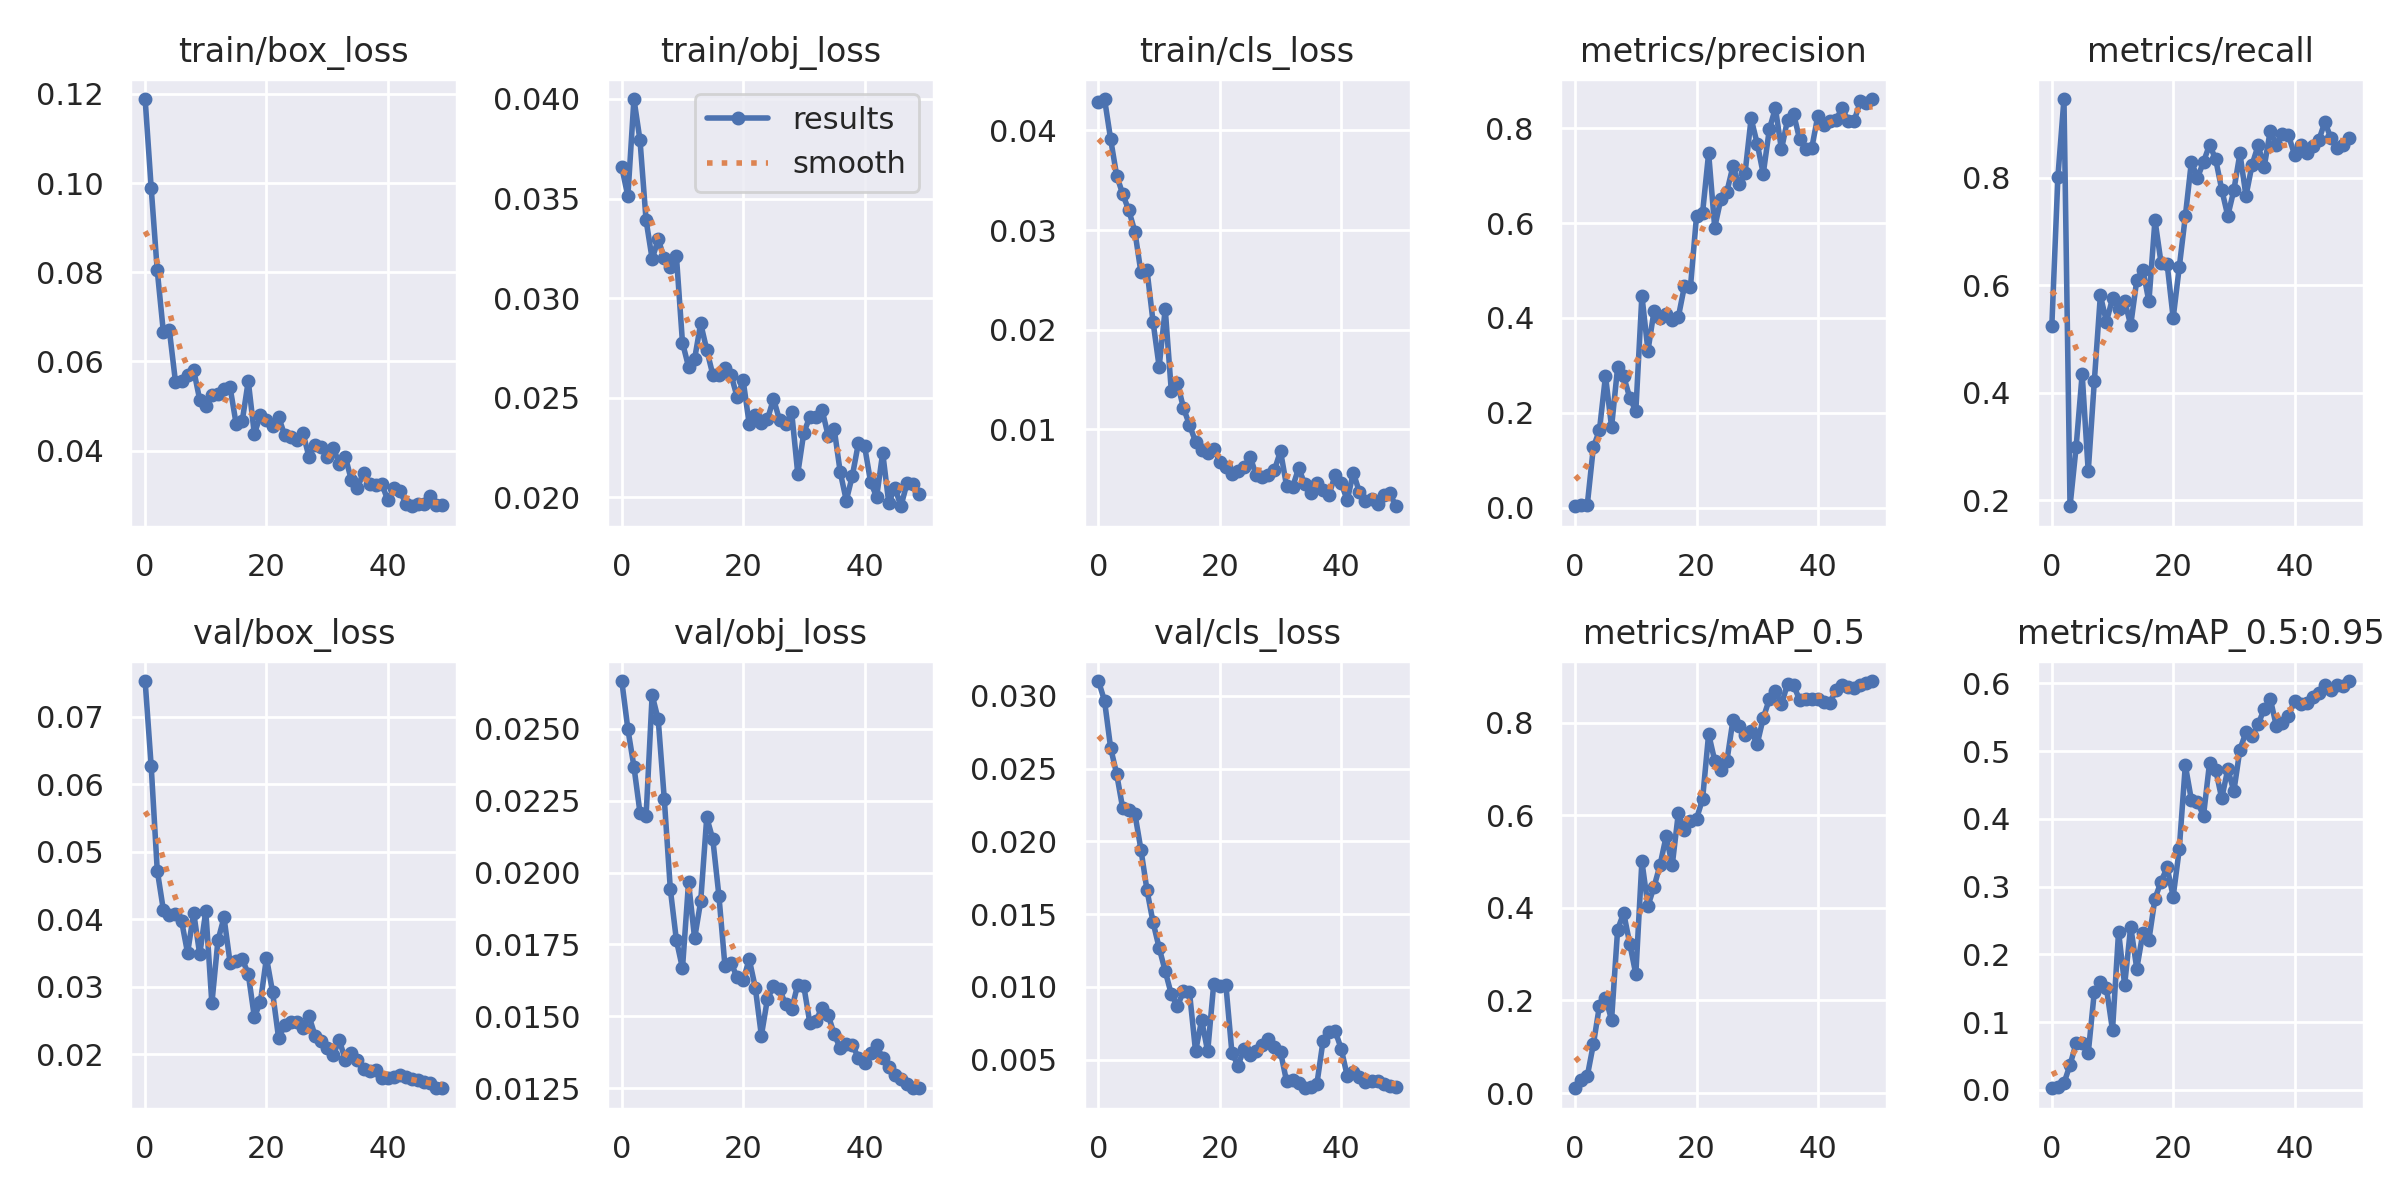

In [ ]:
Display(filename='/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/runs/train/fruit_detection_yolov5/results.png', width=1080)


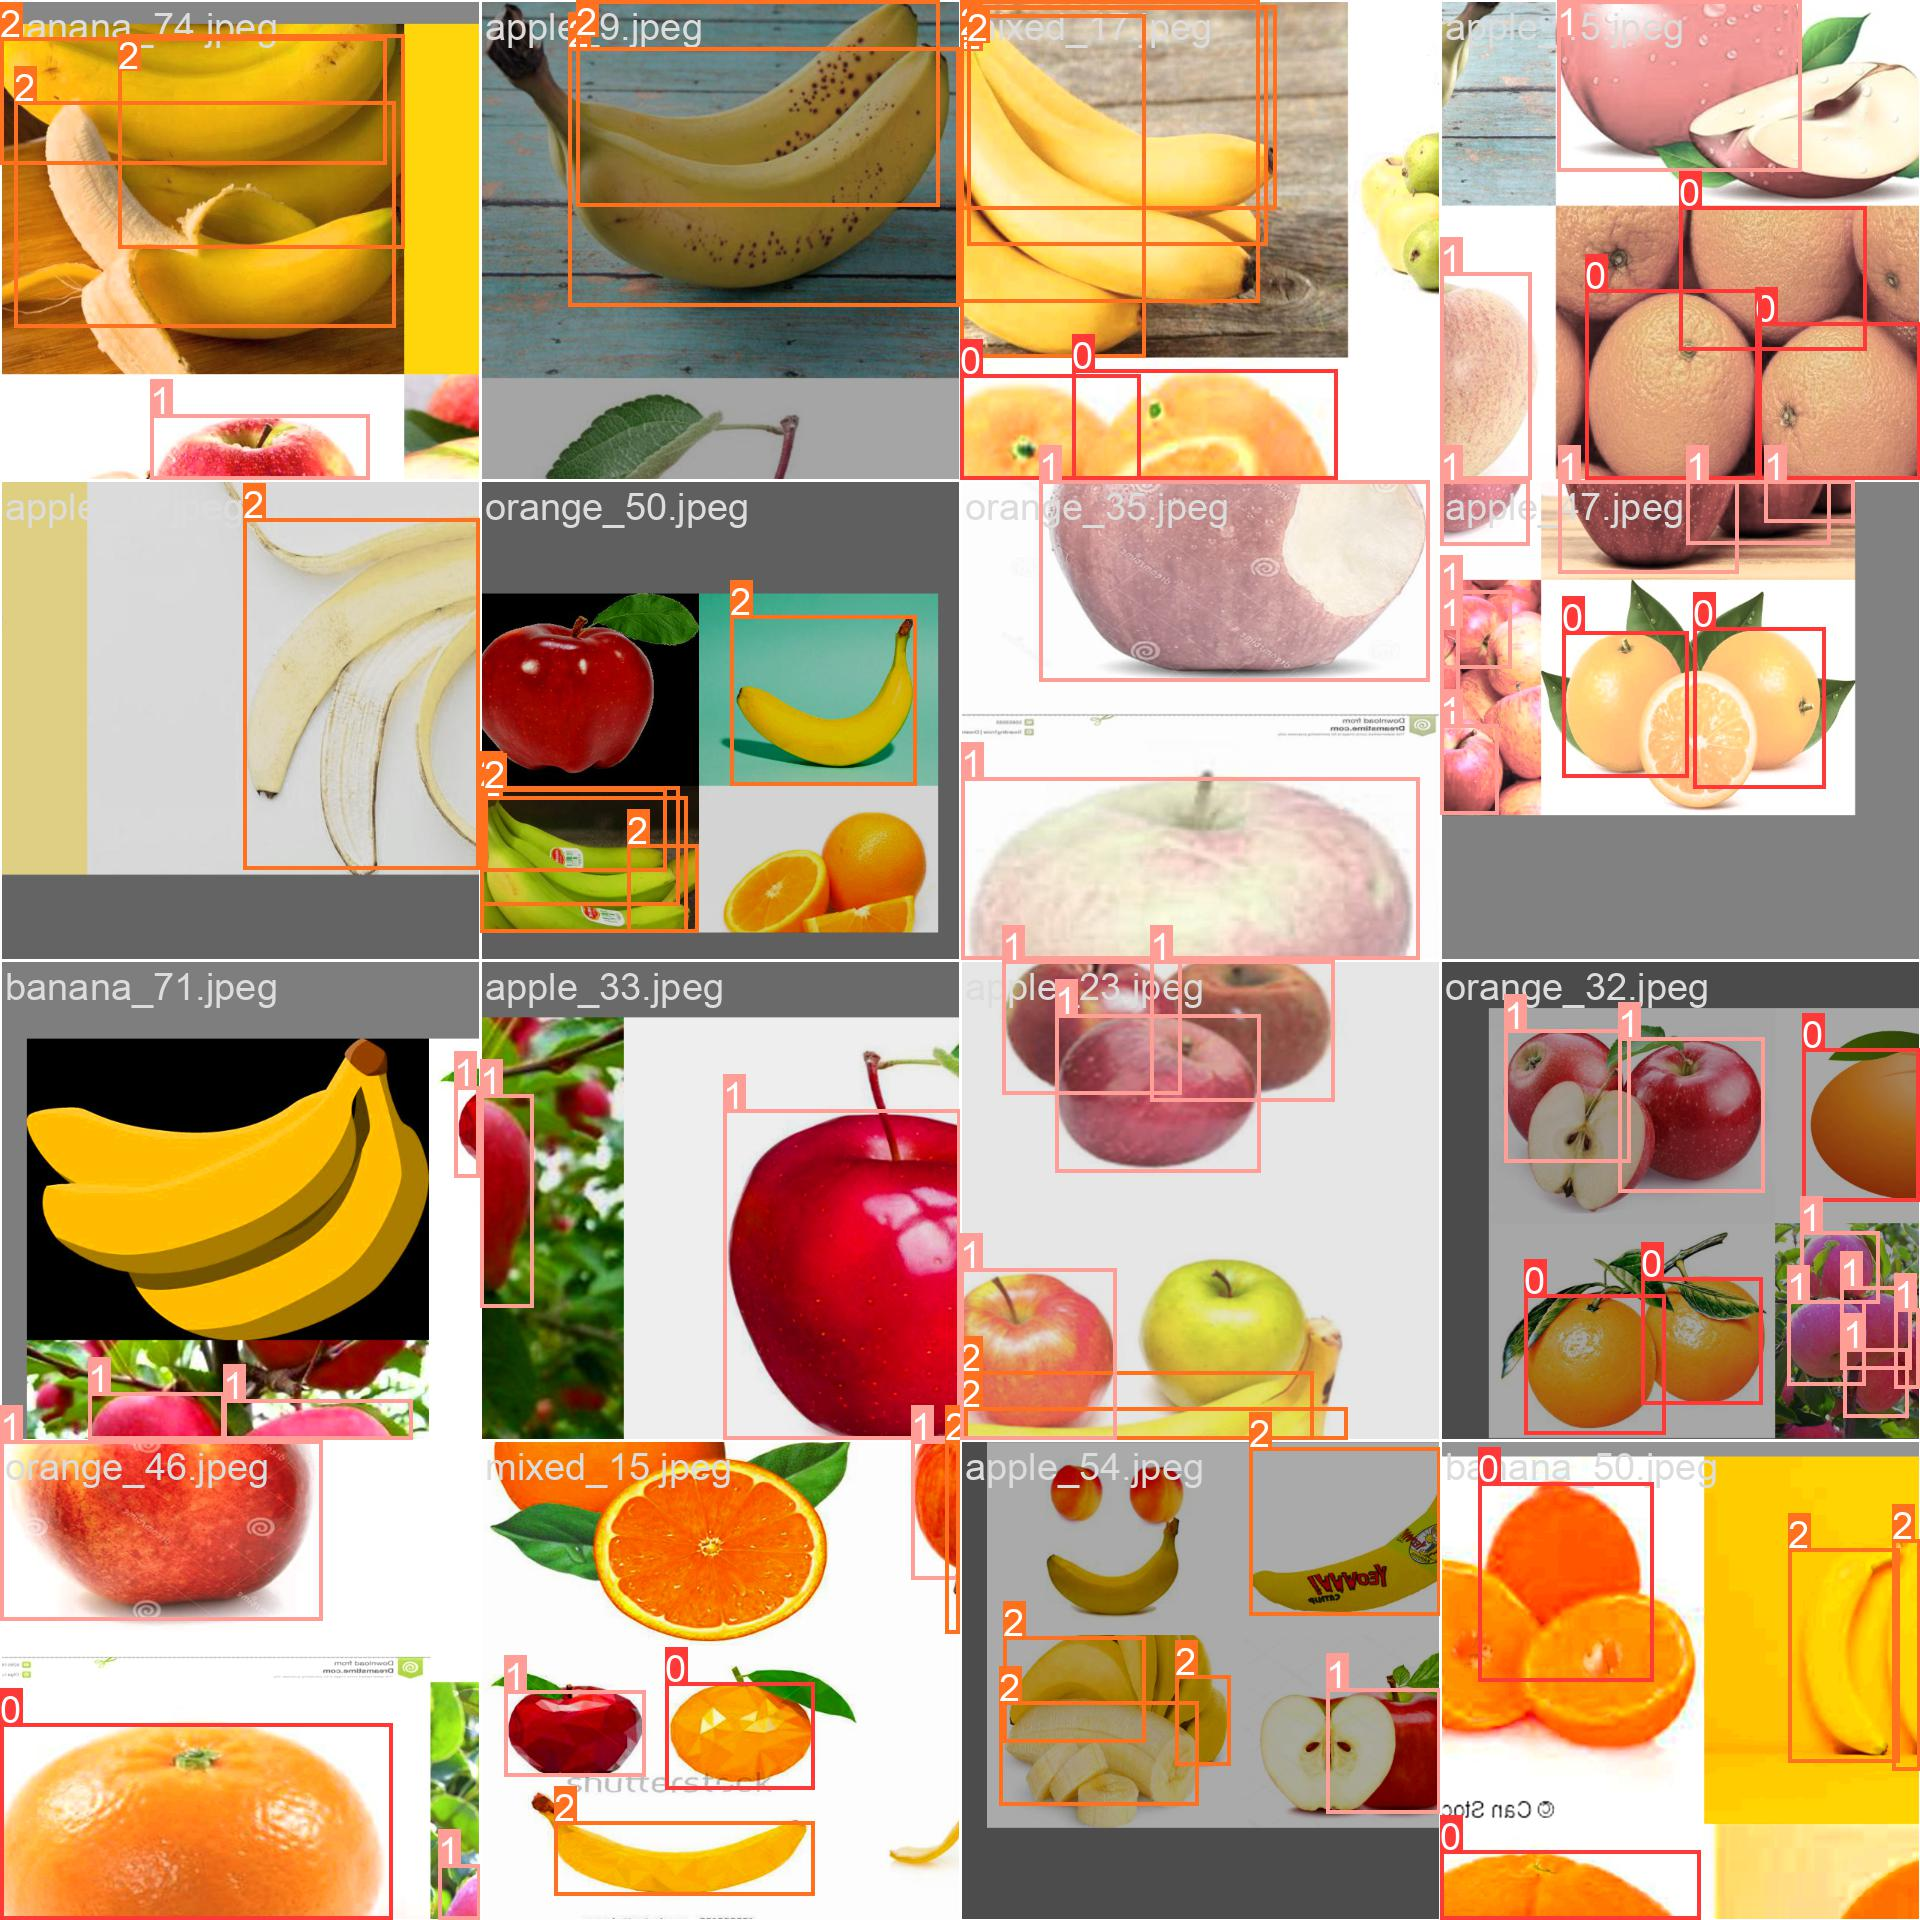

In [ ]:
Display(filename='/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/runs/train/fruit_detection_yolov5/train_batch0.jpg', width=1000)


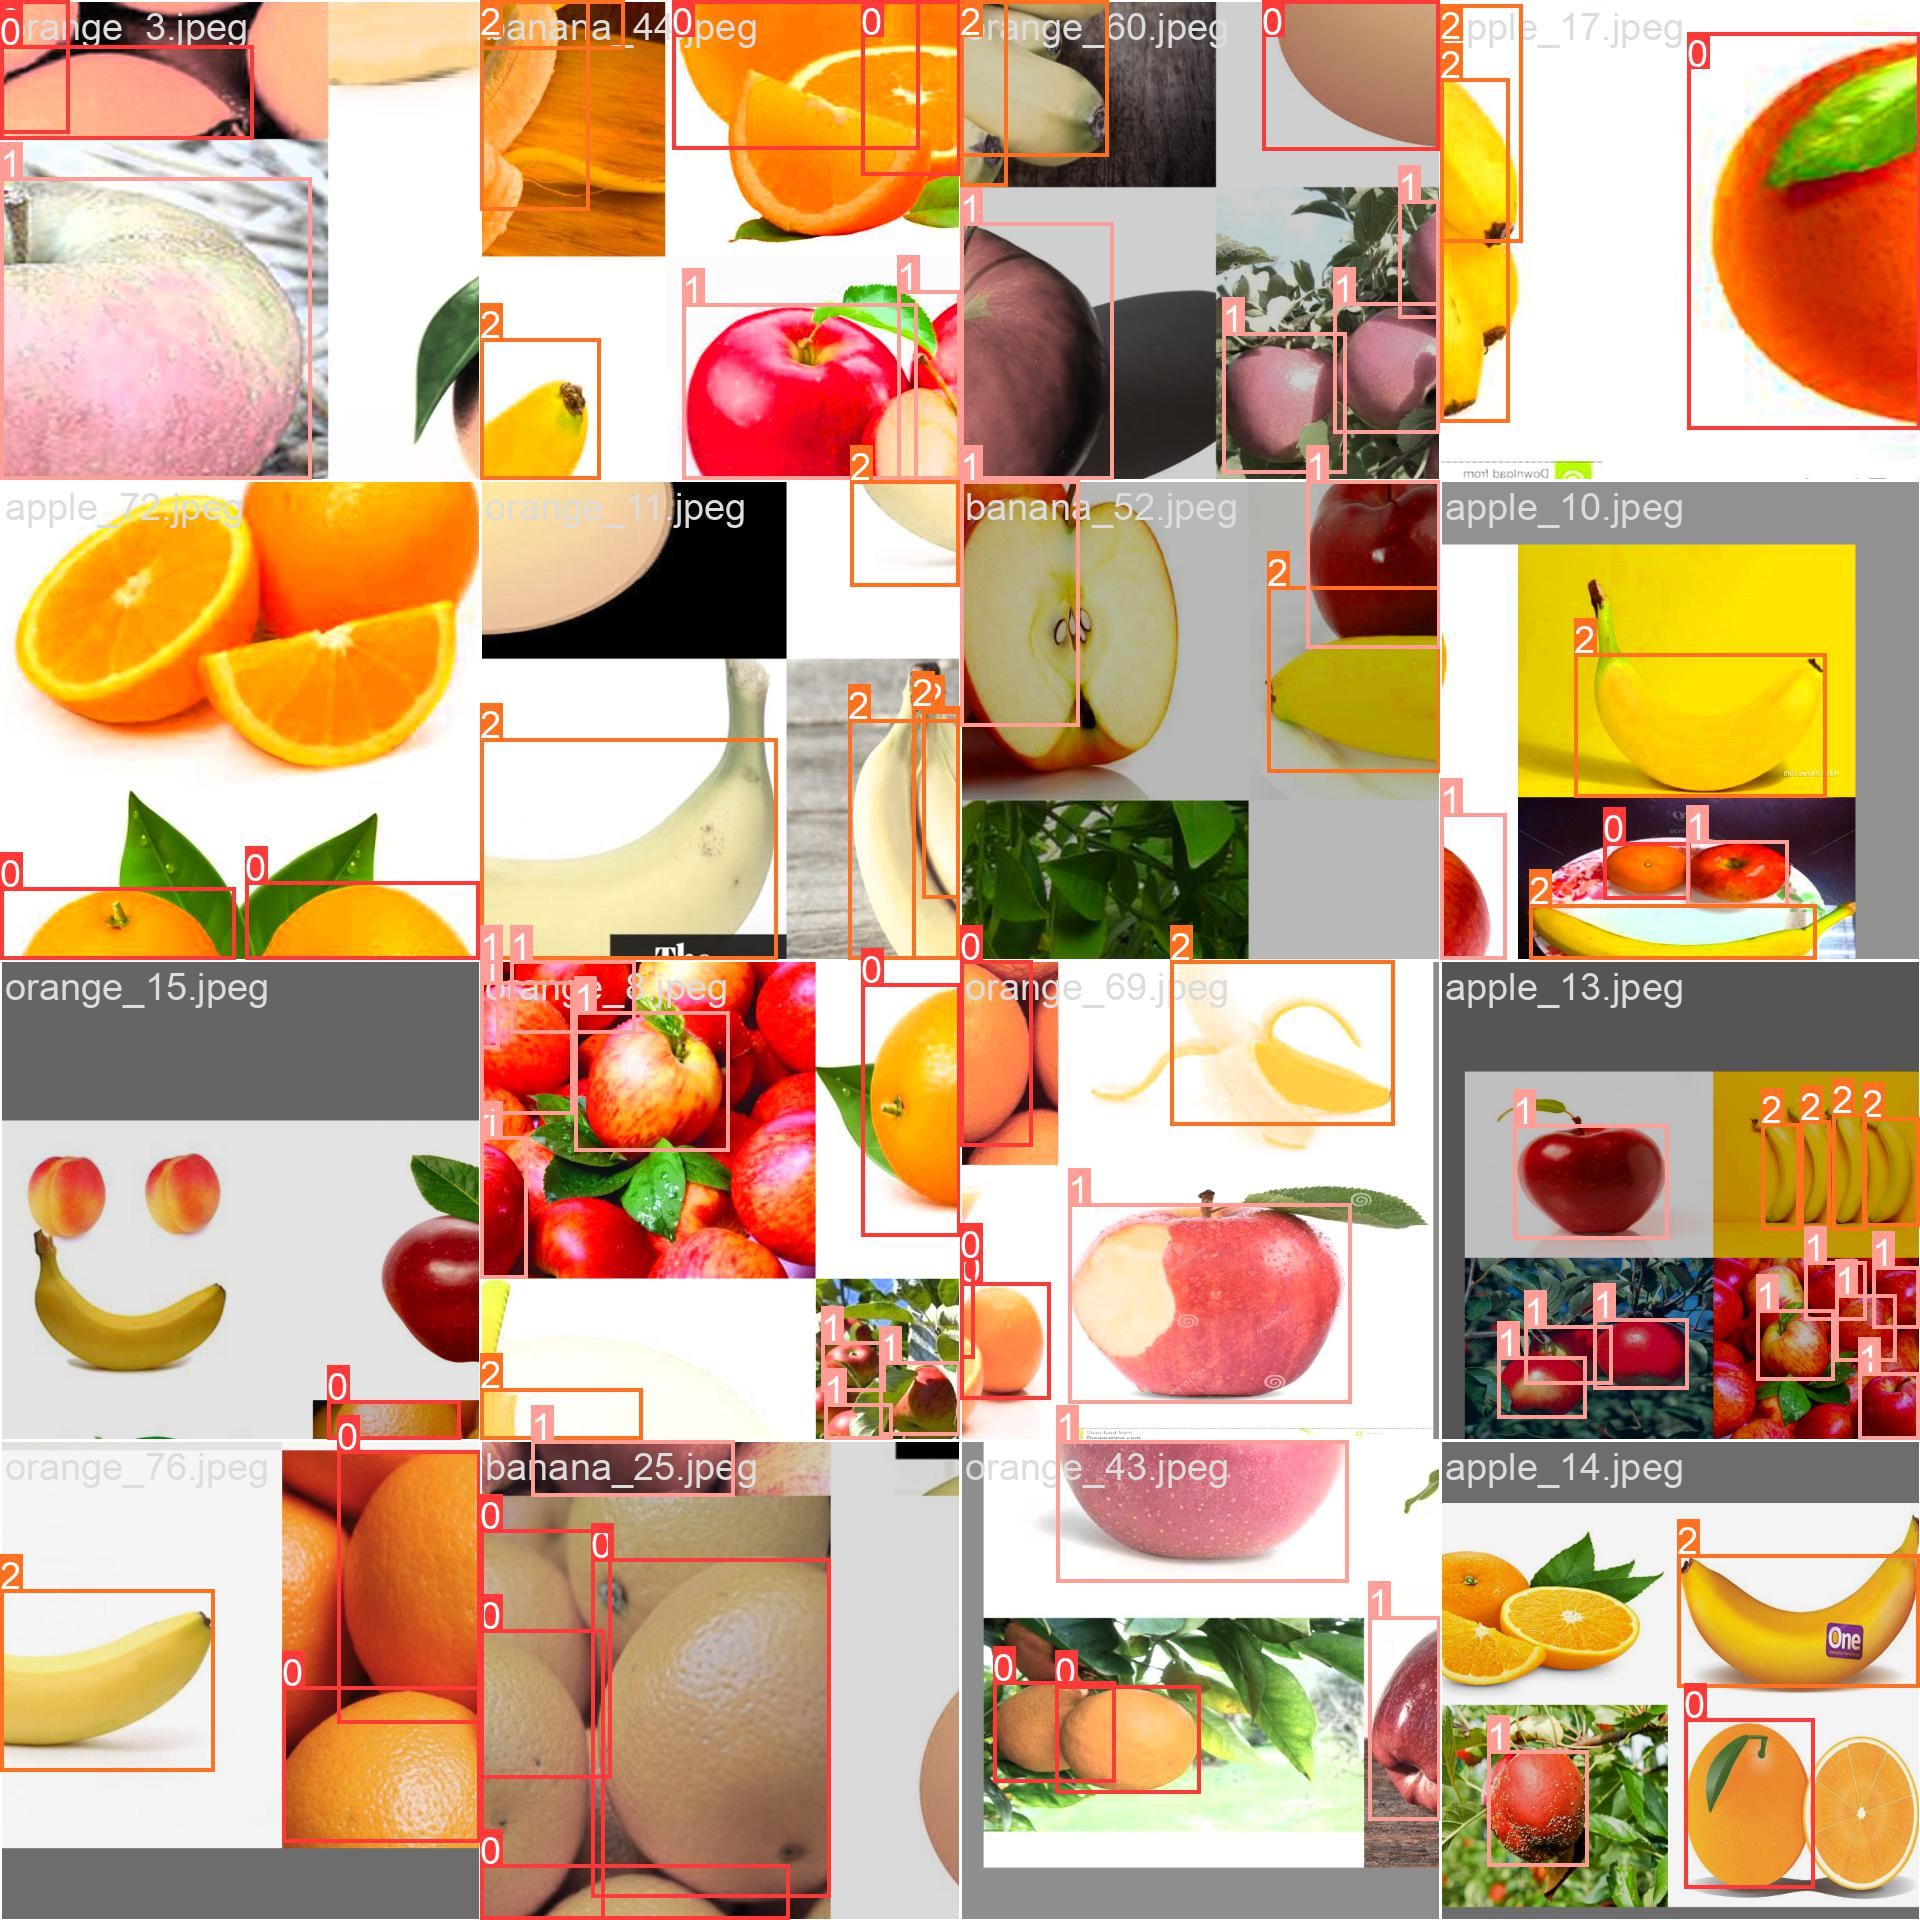

In [ ]:
Display(filename='/content/drive/MyDrive/CV/Ex_4/Dataset/working/yolov5/runs/train/fruit_detection_yolov5/train_batch2.jpg', width=1000)
